## Sobel Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

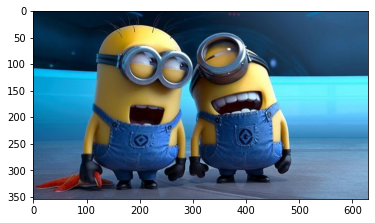

In [2]:
#Loading thr image using matplotlib.pyploy
img=plt.imread("minion.jpeg")
plt.imshow(img)

We start by transforming our image from three channels to one channel using the function bw below after which we will use the median filter to improve our image quality before we use the sobel filter.

We will also use the sobel filter on the image without improving the quality

In [3]:
def  bw(img):
    I=np.zeros((img.shape[0],img.shape[1]))
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            I[i][j]=np.round(np.mean(img[i][j]))
            
    return I

(354, 630)

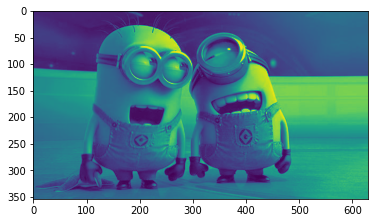

In [4]:
i=bw(img)
plt.imshow(i)
i.shape

#### Median Filter to improve our image 

In [5]:
#filtre hexa en utilisant numpy avec median
def medhex(img):
    L=np.zeros(img.shape)
    m=[]
    p=img.shape[0]-1
    q=img.shape[1]-2
    L[0,:]=img[0,:]
    L[:,0]=img[:,0]
    L[p-1,:]=img[p-1,:]
    L[:,p-1]=img[:,p-1]
    for i in range(1,p-1,1):
        for j in range(2,q-1,1):
            L[i][j]=np.median((img[i-1][j-1],img[i-1][j+1],img[i][j-2],img[i][j],img[i][j+2],img[i+1][j-1],img[i+1][j+1]))          
                
    return L

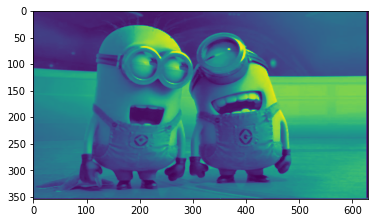

In [6]:
imgameleore=medhex(i)
plt.imshow(imgameleore)

#### Explain How Sobel works

The sobel filter works by calculating the gradient of the pixels of the image in the X and Y dirrection before we normalise the two gradient images created.
Finally we eliminate unecessary pixels in the image to  get our sobel filtered image.

#### Sobel X direction

In [7]:
#gradient parapport a x
def sobelx(img):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    L[0,:]=img[0,:]
    L[:,0]=img[:,0]
    for i in range(1,p-1,1):
        for j in range(1,q-1,1):
            L[i][j]=np.sum(img[i-1][j-1]*1+img[i-1][j]*0+img[i-1][j+1]*(-1)+img[i][j-1]*2+img[i][j]*0+img[i][j+1]*(-2)+img[i+1][j-1]*1+img[i+1][j]*0+img[i+1][j+1]*(-1))
    return L

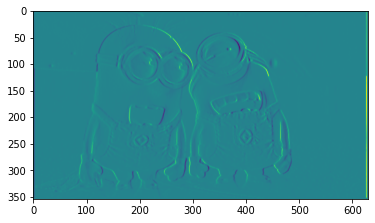

In [8]:
gradx=sobelx(imgameleore)
plt.imshow(gradx)

#### Sobel Y dirrection

In [9]:
#gradient parapport a y
def sobely(img):
    L=np.zeros(img.shape)
    p=img.shape[0]-1
    q=img.shape[1]-1
    L[0,:]=img[0,:]
    L[:,0]=img[:,0]
    for i in range(1,p-1,1):
        for j in range(1,q-1,1):
            L[i][j]=np.sum(img[i-1][j-1]*1+img[i-1][j]*2+img[i-1][j+1]+img[i+1][j-1]*(-1)+img[i+1][j]*(-2)+img[i+1][j+1]*(-1))
    return L

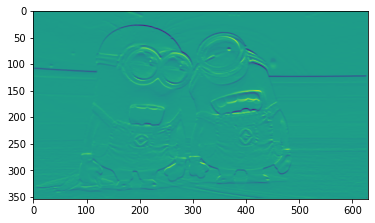

In [10]:
grady=sobely(imgameleore)
plt.imshow(grady)

#### Normalisation

Normlisation of the two dirrections by taking the sqrt of the squares of inidividual correxponing pixelx on the Xgradient image and the Ygradient image

In [11]:
#normalisation
def normsob(img,img2):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    for i in range(0,p,1):
        for j in range(0,q,1):
            L[i][j]=np.round(np.sqrt(img[i][j]**2 + img2[i][j]**2))
    return L

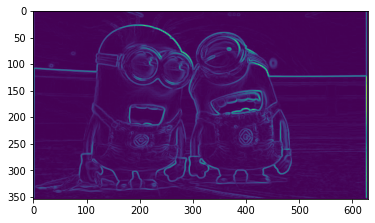

In [12]:
norm=normsob(gradx,grady)
plt.imshow(norm)

#### Eliminate unecessary pixels

In [13]:
#comparer parraport a un seuil pour trouver des point contour
def sob(img):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    #seuil = mean de tous les pixels
    seuil=np.mean(img)
    for i in range(0,p,1):
        for j in range(0,q,1):
            if(img[i][j]>seuil):
                L[i][j]=255  
            else:
                L[i][j]=0
    return L

#### Save generated image

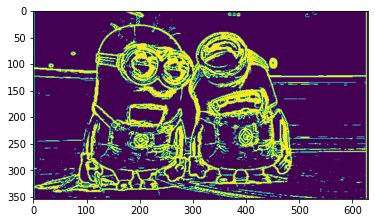

In [14]:
contoursob=sob(norm)
plt.imshow(contoursob)
plt.imsave("contoursobelFiltered.jpeg",contoursob)

### Sobel on image without improvement

In [15]:
#A function that does all the opereations at once we will try it on an image that was not improved jus to see
def sobel(img):
    x=sobelx(img)
    y=sobely(img)
    n=normsob(x,y)
    s=sob(n)
    return s

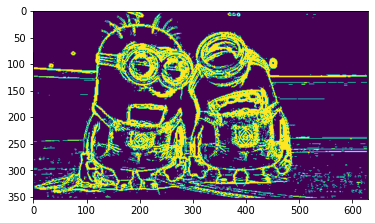

In [16]:
sobel_image=sobel(i)
plt.imshow(sobel_image)

The images generated are almost similar but the second one had more points by the right and left down corners but in general the image improvement did not do much because the pixels in the origial image are not that noisy.